In [1]:
# Import important libraries 
import pickle
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf

In [2]:
# Google Drive file_ids of commercial and non-commercial audio-video features
commercialFeatures_150_file_id          = "15lrTecjJfOUjJmILDpPjnyAmGEVhzceQ"
nonCommercialFeatures_150_file_id       = "1W31Ut7uLazAZiogKIYquN_RhvEN7vebk"

# Destination paths
commercialFeatures_150_destination      = "commercialFeatures.pkl"  
nonCommercialFeatures_150_destination   = "nonCommercialFeatures.pkl"

In [3]:
def download_file_from_google_drive(file_id, destination):
    """
    Download a file from Google Drive if it doesn't already exist locally.

    Parameters:
    - file_id (str): The unique file ID from Google Drive.
    - destination (str): The local path where the file should be saved.
    """
    if os.path.exists(destination):
        print(f'File already exists at {destination}. Skipping download.')
    else:
        url = f"https://drive.google.com/uc?id={file_id}"
        gdown.download(url, destination, quiet=False)

In [4]:
# Downloading commercialFeatures
download_file_from_google_drive(commercialFeatures_150_file_id, commercialFeatures_150_destination)

# Downloading nonCommercialFeatures
download_file_from_google_drive(nonCommercialFeatures_150_file_id, nonCommercialFeatures_150_destination)

Downloading...
From (original): https://drive.google.com/uc?id=15lrTecjJfOUjJmILDpPjnyAmGEVhzceQ
From (redirected): https://drive.google.com/uc?id=15lrTecjJfOUjJmILDpPjnyAmGEVhzceQ&confirm=t&uuid=e94254ed-1b6b-4974-a1b0-c7c2f678627e
To: /Users/Aryan/Documents/Projects/2024_GSoC@BeagleBoard.org/gsoc_2024-enhanced_media_experience_with_ai-powered_commercial_detection_and_replacement/Model/datasetPreProcessing/commercialFeatures.pkl
100%|██████████████████████████████████████| 1.06G/1.06G [01:17<00:00, 13.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1W31Ut7uLazAZiogKIYquN_RhvEN7vebk
From (redirected): https://drive.google.com/uc?id=1W31Ut7uLazAZiogKIYquN_RhvEN7vebk&confirm=t&uuid=3e7a1c5d-875e-4b17-9228-9690a23609bf
To: /Users/Aryan/Documents/Projects/2024_GSoC@BeagleBoard.org/gsoc_2024-enhanced_media_experience_with_ai-powered_commercial_detection_and_replacement/Model/datasetPreProcessing/nonCommercialFeatures.pkl
100%|██████████████████████████████████████| 1.1

In [8]:
# Function for loading Audio-Visual Features of Commercial and Non-Commercial Videos
def load_features():
    """
    Load data from a pickled file if it exists, otherwise initialize an empty list.

    Returns:
    - commercial_loaded (list) - List containing Commercial video features
    - non_commercial_loaded (list) - List containing nonCommercial video features
    """
    with open('commercialFeatures.pkl', 'rb') as f:
        commercial_loaded = pickle.load(f)
        
    with open('nonCommercialFeatures.pkl', 'rb') as f:
        non_commercial_loaded = pickle.load(f)
        
    print(f'Number of Commercial features: {len(commercial_loaded)}')
    print(f'Number of nonCommercial features: {len(non_commercial_loaded)}')
    print("Features Loaded Successfully")
    
    return commercial_loaded, non_commercial_loaded

In [9]:
commercialFeatures, nonCommercialFeatures = load_features()

Number of Commercial features: 4364
Number of nonCommercial features: 4600
Features Loaded Successfully


# Data Visualization

In [10]:
def analysis(features):
    """
    Analyze the lengths of sequences in the provided list of features.

    Parameters:
    features (list of list) - A list where each element is a list representing a video sequence.

    Returns:
    sequence_length (list of int) - A list containing the lengths of each video sequence.

    Prints:
    Mean length (float) - The mean length of the video sequences.
    Median length (float) - The median length of the video sequences.
    Min length (int) - The minimum length of the video sequences.
    Max length (int) - The maximum length of the video sequences.
    Standard Deviation (float) - The standard deviation of the lengths of the video sequences.
    """
    sequence_length = [len(video) for video in features]
    mean_length = np.mean(sequence_length)
    median_length = np.median(sequence_length)
    min_length = np.min(sequence_length)
    max_length = np.max(sequence_length)
    std_length = np.std(sequence_length)

    print(f"Mean length: {mean_length}")
    print(f"Median length: {median_length}")
    print(f"Min length: {min_length}")
    print(f"Max length: {max_length}")
    print(f"Standard Deviation: {std_length}")

    return sequence_length

In [11]:
def plot(sequence_length):
    """
    Plot the distribution and analyze percentiles of sequence lengths.

    Parameters:
    - sequence_length (list of int) - A list containing the lengths of each video sequence.

    Prints:
    - 25th percentile (float) - The 25th percentile of the sequence lengths.
    - 50th percentile (median) (float) - The 50th percentile (median) of the sequence lengths.
    - 75th percentile (float) - The 75th percentile of the sequence lengths.
    - 90th percentile (float) - The 90th percentile of the sequence lengths.
    - 95th percentile (float) - The 95th percentile of the sequence lengths.
    - 99th percentile (float) - The 99th percentile of the sequence lengths.

    Plots:
    Distribution of Sequence Lengths:
        - A histogram with a kernel density estimate (KDE) of the sequence lengths.
    Box Plot of Sequence Lengths:
        - A box plot of the sequence lengths.
    """
    
    # Plot the distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(sequence_length, bins=50, kde=True)
    plt.title('Distribution of Sequence Lengths')
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.show()
    
    # Box plot for more insight
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=sequence_length)
    plt.title('Box Plot of Sequence Lengths')
    plt.xlabel('Sequence Length')
    plt.show()
    
    # Analyze percentiles
    percentiles = np.percentile(sequence_length, [25, 50, 75, 90, 95, 99])
    print(f"25th percentile: {percentiles[0]}")
    print(f"50th percentile (median): {percentiles[1]}")
    print(f"75th percentile: {percentiles[2]}")
    print(f"90th percentile: {percentiles[3]}")
    print(f"95th percentile: {percentiles[4]}")
    print(f"99th percentile: {percentiles[5]}")

In [12]:
Commercial_sequence_length= analysis(commercialFeatures)

Mean length: 211.08936755270395
Median length: 201.5
Min length: 119
Max length: 300
Standard Deviation: 66.30195962629953


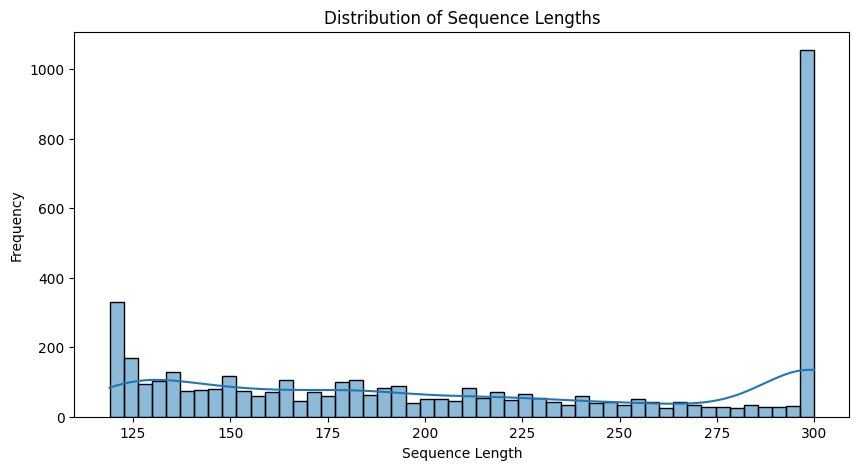

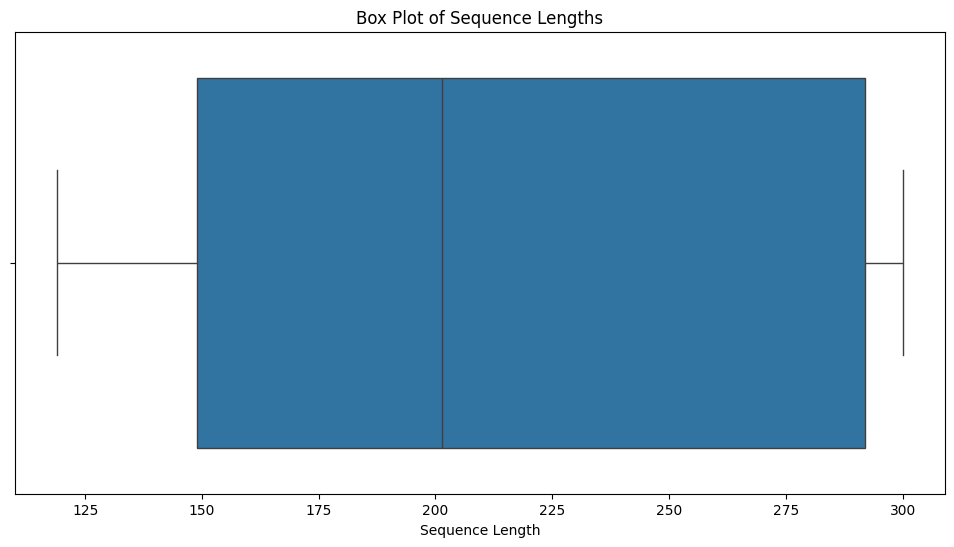

25th percentile: 149.0
50th percentile (median): 201.5
75th percentile: 292.0
90th percentile: 300.0
95th percentile: 300.0
99th percentile: 300.0


In [13]:
plot(Commercial_sequence_length)

In [14]:
nonCommercial_Sequence_length = analysis(nonCommercialFeatures)

Mean length: 221.31021739130435
Median length: 218.0
Min length: 1
Max length: 301
Standard Deviation: 63.52977788575693


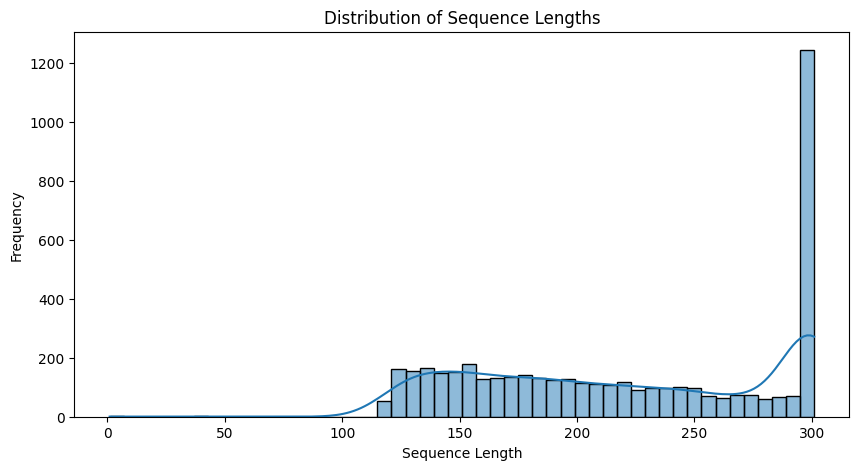

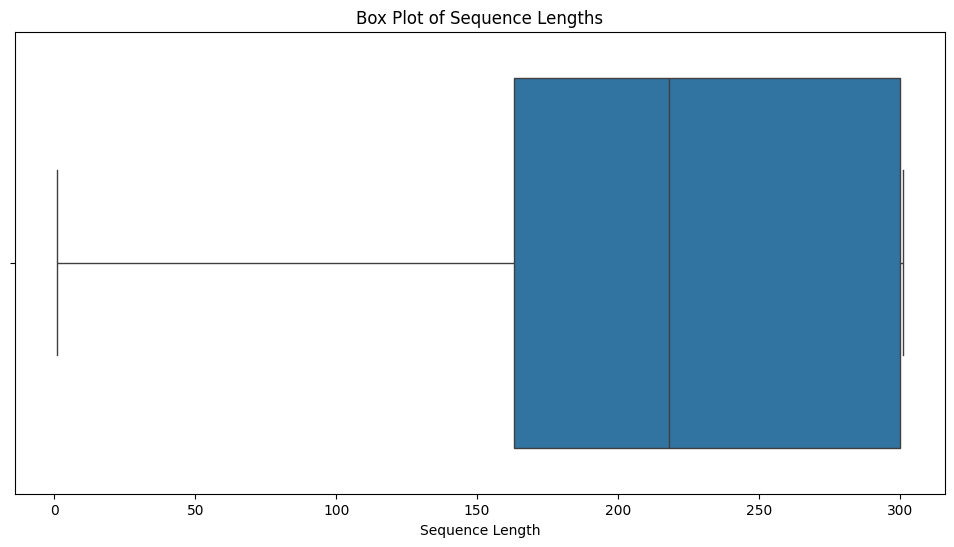

25th percentile: 163.0
50th percentile (median): 218.0
75th percentile: 300.0
90th percentile: 300.0
95th percentile: 300.0
99th percentile: 300.0


In [15]:
plot(nonCommercial_Sequence_length)

# Find the Frequency

In [16]:
def calculate_frequency(sequence_length):
    """
    Calculate the frequency of elements in a sequence and print them.

    Parameters:
    - sequence_length (list of int) : A list containing elements whose frequencies are to be calculated.
    """
    frequency = {}
    for element in sequence_length:
        if element in frequency:
            frequency[element] += 1
        else:
            frequency[element] = 1
    
    frequency = sorted(frequency.items())  # Sort the list of tuples by keys
    
    for key, value in frequency:
        print(f"Element: {key}, Frequency: {value}")

In [17]:
calculate_frequency(Commercial_sequence_length)

Element: 119, Frequency: 27
Element: 120, Frequency: 148
Element: 121, Frequency: 88
Element: 122, Frequency: 67
Element: 123, Frequency: 42
Element: 124, Frequency: 44
Element: 125, Frequency: 45
Element: 126, Frequency: 38
Element: 127, Frequency: 37
Element: 128, Frequency: 30
Element: 129, Frequency: 28
Element: 130, Frequency: 22
Element: 131, Frequency: 37
Element: 132, Frequency: 27
Element: 133, Frequency: 17
Element: 134, Frequency: 34
Element: 135, Frequency: 43
Element: 136, Frequency: 25
Element: 137, Frequency: 28
Element: 138, Frequency: 32
Element: 139, Frequency: 16
Element: 140, Frequency: 27
Element: 141, Frequency: 15
Element: 142, Frequency: 20
Element: 143, Frequency: 26
Element: 144, Frequency: 16
Element: 145, Frequency: 19
Element: 146, Frequency: 33
Element: 147, Frequency: 29
Element: 148, Frequency: 17
Element: 149, Frequency: 32
Element: 150, Frequency: 44
Element: 151, Frequency: 23
Element: 152, Frequency: 18
Element: 153, Frequency: 13
Element: 154, Frequ

In [18]:
calculate_frequency(nonCommercial_Sequence_length)

Element: 1, Frequency: 2
Element: 39, Frequency: 1
Element: 118, Frequency: 1
Element: 119, Frequency: 17
Element: 120, Frequency: 35
Element: 121, Frequency: 23
Element: 122, Frequency: 27
Element: 123, Frequency: 23
Element: 124, Frequency: 31
Element: 125, Frequency: 29
Element: 126, Frequency: 29
Element: 127, Frequency: 27
Element: 128, Frequency: 27
Element: 129, Frequency: 34
Element: 130, Frequency: 16
Element: 131, Frequency: 24
Element: 132, Frequency: 27
Element: 133, Frequency: 24
Element: 134, Frequency: 37
Element: 135, Frequency: 23
Element: 136, Frequency: 26
Element: 137, Frequency: 29
Element: 138, Frequency: 27
Element: 139, Frequency: 27
Element: 140, Frequency: 34
Element: 141, Frequency: 19
Element: 142, Frequency: 15
Element: 143, Frequency: 22
Element: 144, Frequency: 30
Element: 145, Frequency: 24
Element: 146, Frequency: 17
Element: 147, Frequency: 27
Element: 148, Frequency: 23
Element: 149, Frequency: 30
Element: 150, Frequency: 32
Element: 151, Frequency: 3

In [19]:
print(len(nonCommercial_Sequence_length))

4600


In [20]:
nonCommercialFeatures = [video for video in nonCommercialFeatures if len(video)>=100]

In [21]:
nonCommercial_Sequence_length = analysis(nonCommercialFeatures)

Mean length: 221.44572547313464
Median length: 218.0
Min length: 118
Max length: 301
Standard Deviation: 63.32694085118265


In [22]:
print(len(nonCommercial_Sequence_length))

4597


# Padding and Trimming

In [23]:
def preprocess_features(max_frames, features):
    """
    Preprocess video features by trimming or padding them to a fixed number of frames.

    Parameters:
    - max_frames (int) - The maximum number of frames each video should have.
    - features (list of ndarray) -  A list where each element is a numpy array representing the features of a video. Each array is of shape (number_of_frames, number_Vf).

    Returns:
    - video_data (ndarray) -  A numpy array of shape (num_videos, max_frames, number_Vf) containing the preprocessed video data.
    """
    num_videos = len(features)
    number_Vf = features[0].shape[1]
    video_data = np.zeros((num_videos, max_frames, number_Vf))

    # Process each video
    for i, video in enumerate(features):
        length = len(video)
        if length >= max_frames:
            # Trim the video if longer than max_frames
            video_data[i, :, :] = video[:max_frames]
        else:
            # Pad the video with zeros if shorter than max_frames
            video_data[i, :length, :] = video

    return video_data

In [24]:
def convertToNumpyArray(features):
    """
    Convert a list of features to a NumPy array.

    Parameters:
    - features (list) - A list of features to be converted to a NumPy array.

    Returns:
    - numpy.ndarray: A NumPy array containing the elements of the input list.
    """
    return np.array(features)

In [25]:
# trim commercial features to sequence_length = 150
commercialFeatures_150 = preprocess_features(150, commercialFeatures)

### Other sequence lengths list could be generated by changing the length from 150 to desired number of sequences. 

In [26]:
# trim non-commercial features to sequence_length = 150
nonCommercialFeatures_150 = preprocess_features(150, nonCommercialFeatures)

# Converting the features into Numpy Array

In [27]:
commercialFeatures_150 = convertToNumpyArray(commercialFeatures_150)

In [28]:
print(commercialFeatures_150.shape)

(4364, 150, 1152)


In [29]:
nonCommercialFeatures_150 = convertToNumpyArray(nonCommercialFeatures_150)

# Saving the Numpy Arrays

In [32]:
def save_numpy_array_as_pickle(array, name):
    """
    Save a NumPy array as a pickle file with the given name.

    Parameters:
    - array (numpy.ndarray) : The NumPy array to be saved.
    - name (str) : The name of the variable, which will be used as the filename.
    """
    with open(f"{name}.pkl", "wb") as file:
        pickle.dump(array, file)

In [33]:
save_numpy_array_as_pickle(commercialFeatures_150, 'commercialFeatures_150')

In [34]:
save_numpy_array_as_pickle(nonCommercialFeatures_150, 'nonCommercialFeatures_150')